# Practical 11: Support Vector Machine
---
**ID:** 17CE023<br>
**Author:** Bhishm Daslaniya<br>

---


In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScalera
from sklearn.svm import SVC

In [54]:
zero_one_colourmap = ListedColormap(('red', 'green','blue'))

## Plotting Decision Boundary Function

In [33]:
def plot_decision_boundary(X, y, clf):
  X_set, y_set = X, y
  X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
  plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
  for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
  plt.title('SVM Decision Boundary')
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.legend()
  return plt.show()

## Plotting 3D Plot

In [34]:
def plot_3d_plot(X, y):
  r = np.exp(-(X ** 2).sum(1))
  ax = plt.subplot(projection='3d')
  ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap=zero_one_colourmap)
  ax.set_xlabel('X1')
  ax.set_ylabel('X2')
  ax.set_zlabel('y')
  return ax

### Load the Data

In [3]:
# import some data to play with
iris = datasets.load_iris()
iris.feature_names
# iris

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
X = iris.data[:, 2:4] # we only take the first two features. We could
 # avoid this ugly slicing by using a two-dim dataset
y = iris.target

In [6]:
# split data in train and test 80% train 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Linear Classifier

In [35]:
classifier = SVC(kernel="linear", gamma = 'auto' , C = 1)
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [38]:
accuracy_score(y_test, y_pred)

0.9666666666666667

In [39]:
confusion_matrix(y_test, y_pred)

array([[13,  0,  0],
       [ 0,  5,  1],
       [ 0,  0, 11]], dtype=int64)

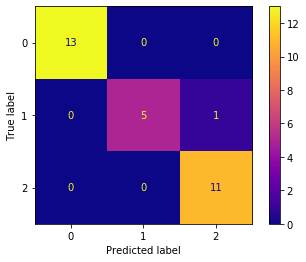

In [40]:
plot_confusion_matrix(classifier, X_test, y_test, cmap="plasma")

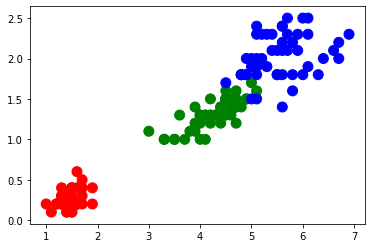

In [55]:
plt.scatter(X[:,0],X[:,1], c=y, s=100, cmap = zero_one_colourmap)
plt.show()

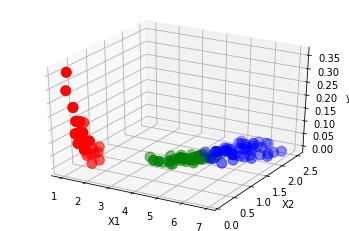

In [87]:
plot_3d_plot(X, y)

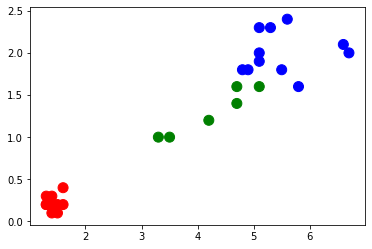

In [56]:
plt.scatter(X_test[:,0],X_test[:,1], c=y_test, s=100, cmap = zero_one_colourmap)
plt.show()

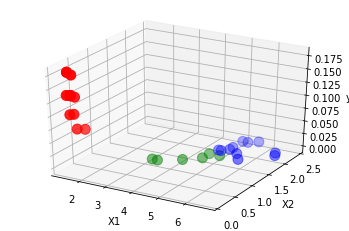

In [88]:
plot_3d_plot(X_test, y_test)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


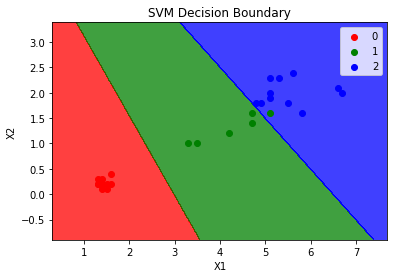

In [57]:
plot_decision_boundary(X_test, y_test, classifier)

# Non Linear SVM Classifier

### rbf_classifier

In [59]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train.ravel())
y_pred = rbf_classifier.predict(X_test)

In [60]:
accuracy_score(y_test, y_pred)

0.9333333333333333

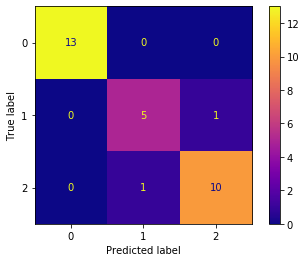

In [61]:
plot_confusion_matrix(rbf_classifier, X_test, y_test, cmap="plasma")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


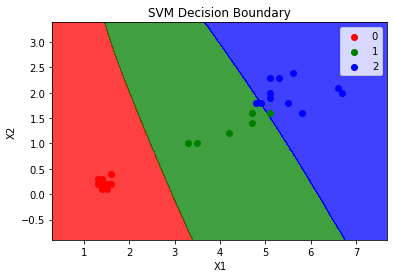

In [62]:
plot_decision_boundary(X_test, y_test, rbf_classifier)

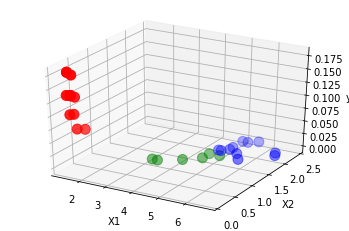

In [82]:
plot_3d_plot(X_test, y_test)

### Polynomial_classifier

In [78]:
poly_classifier = SVC(kernel="poly")
poly_classifier.fit(X_train, y_train.ravel())
y_pred = poly_classifier.predict(X_test)

In [79]:
accuracy_score(y_test, y_pred)

0.9666666666666667

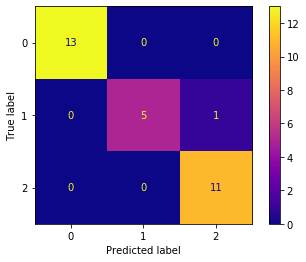

In [80]:
plot_confusion_matrix(poly_classifier, X_test, y_test, cmap="plasma")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


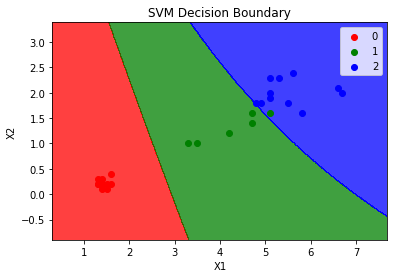

In [81]:
plot_decision_boundary(X_test, y_test, poly_classifier)

#### Conclusion: 
    So we can observe that for linear and polynomial classifier give the higher accuracy so it can be useful for classification. 
    rbf gives less accuracy compare to linear and polynomial function.

---